Подключаем библиотеки

In [1]:
import cupy as cp
import matplotlib.pyplot as plt

from utils.data_loader import load_dataset
from model.vae_gan import train_vae, train_vae_gan
from utils.visualisation import plot_samples

Гиперпараметры

In [2]:
LATENT_DIM = 64
EPOCHS = 100
BATCH_SIZE = 1024

cp.random.seed(42)

Загружаем данные

In [3]:
train_X, train_y, test_X, test_y = load_dataset("MNIST", train_percent=0.9, load_percent=1)
train_X = train_X.astype(cp.float32) / 255.0
train_X = train_X.reshape(len(train_X), -1)
train_labels = cp.argmax(train_y, axis=1).astype(cp.int32)
test_X = test_X.astype(cp.float32) / 255.0
test_X = test_X.reshape(len(test_X), -1)
test_labels = cp.argmax(test_y, axis=1).astype(cp.int32)

Тренеруем VAE

In [23]:
vae_plain, loss_vae = train_vae(train_X, train_labels,
                                    test_X, test_labels,
                                    latent_dim=LATENT_DIM, epochs=EPOCHS,
                                    batch_size=BATCH_SIZE, lr=0.1, l2=0.001, 
                                    conditional=False)

VAE epoch 1/100: loss=0.7043
VAE epoch 2/100: loss=0.6940
VAE epoch 3/100: loss=0.6863
VAE epoch 4/100: loss=0.6796
VAE epoch 5/100: loss=0.6734
VAE epoch 6/100: loss=0.6670
VAE epoch 7/100: loss=0.6607
VAE epoch 8/100: loss=0.6543
VAE epoch 9/100: loss=0.6479
VAE epoch 10/100: loss=0.6408
VAE epoch 11/100: loss=0.6338
VAE epoch 12/100: loss=0.6259
VAE epoch 13/100: loss=0.6176
VAE epoch 14/100: loss=0.6087
VAE epoch 15/100: loss=0.5994
VAE epoch 16/100: loss=0.5894
VAE epoch 17/100: loss=0.5795
VAE epoch 18/100: loss=0.5682
VAE epoch 19/100: loss=0.5568
VAE epoch 20/100: loss=0.5452
VAE epoch 21/100: loss=0.5335
VAE epoch 22/100: loss=0.5212
VAE epoch 23/100: loss=0.5089
VAE epoch 24/100: loss=0.4967
VAE epoch 25/100: loss=0.4848
VAE epoch 26/100: loss=0.4736
VAE epoch 27/100: loss=0.4622
VAE epoch 28/100: loss=0.4519
VAE epoch 29/100: loss=0.4416
VAE epoch 30/100: loss=0.4332
VAE epoch 31/100: loss=0.4238
VAE epoch 32/100: loss=0.4164
VAE epoch 33/100: loss=0.4085
VAE epoch 34/100: l

Рисуем результаты VAE

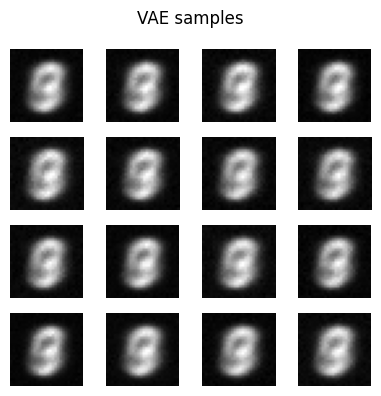

In [24]:
samples_vae = vae_plain.sample(num_samples=16)
plot_samples(samples_vae, "VAE samples")

График потерь VAE

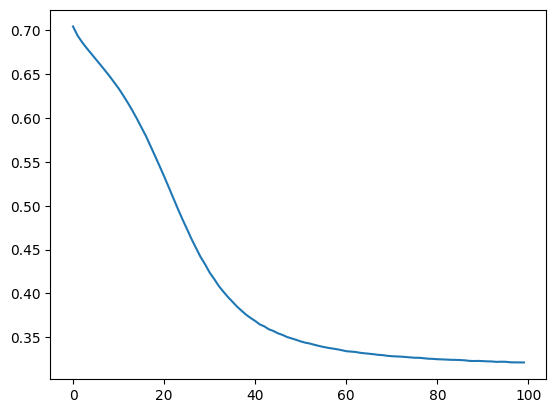

In [25]:
plt.plot(range(len(loss_vae)), [l.get() for l in loss_vae])
plt.show()

Тренеруем VAE + GAN

In [21]:
vae_gan, disc_gan, loss_vae_gan = train_vae_gan(
        train_X, train_labels,
        latent_dim=LATENT_DIM, epochs=100, batch_size=128,
        lr_vae=0.1, lr_d=0.001,
        lambda_gan=0.1, conditional=False, l2=0.1
    )

VAE+GAN epoch 1/100: loss=0.8753
VAE+GAN epoch 2/100: loss=0.9415
VAE+GAN epoch 3/100: loss=0.9722
VAE+GAN epoch 4/100: loss=0.9848
VAE+GAN epoch 5/100: loss=0.9832
VAE+GAN epoch 6/100: loss=0.9550
VAE+GAN epoch 7/100: loss=0.8597
VAE+GAN epoch 8/100: loss=0.6568
VAE+GAN epoch 9/100: loss=0.5396
VAE+GAN epoch 10/100: loss=0.4913
VAE+GAN epoch 11/100: loss=0.4686
VAE+GAN epoch 12/100: loss=0.4548
VAE+GAN epoch 13/100: loss=0.4388
VAE+GAN epoch 14/100: loss=0.4253
VAE+GAN epoch 15/100: loss=0.4205
VAE+GAN epoch 16/100: loss=0.4119
VAE+GAN epoch 17/100: loss=0.4088
VAE+GAN epoch 18/100: loss=0.4084
VAE+GAN epoch 19/100: loss=0.4048
VAE+GAN epoch 20/100: loss=0.4068
VAE+GAN epoch 21/100: loss=0.4012
VAE+GAN epoch 22/100: loss=0.3997
VAE+GAN epoch 23/100: loss=0.4006
VAE+GAN epoch 24/100: loss=0.3969
VAE+GAN epoch 25/100: loss=0.3980
VAE+GAN epoch 26/100: loss=0.3973
VAE+GAN epoch 27/100: loss=0.3961
VAE+GAN epoch 28/100: loss=0.3954
VAE+GAN epoch 29/100: loss=0.3952
VAE+GAN epoch 30/100: l

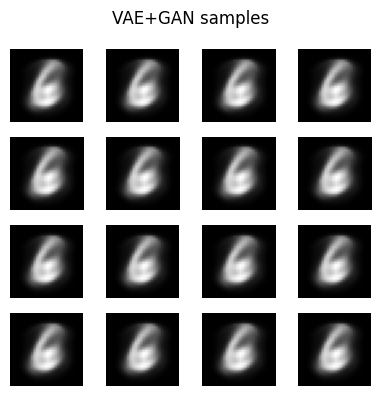

In [22]:
samples_gan = vae_gan.sample(num_samples=16)
plot_samples(samples_gan, "VAE+GAN samples")

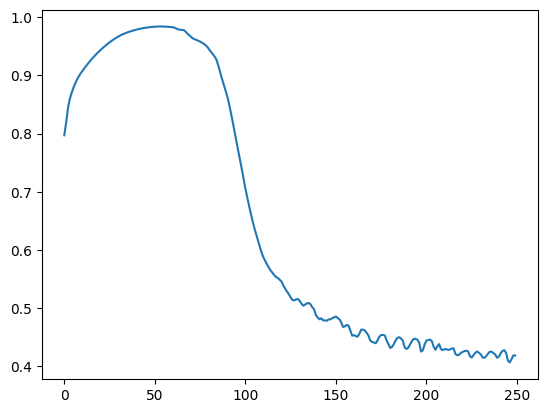

In [20]:
plt.plot(range(len(loss_vae_gan)), [l.get() for l in loss_vae_gan])
plt.show()

In [23]:
vae_gan, disc_gan, loss_vae_gan = train_vae_gan(
        train_X, train_labels,
        latent_dim=LATENT_DIM, epochs=100, batch_size=128,
        lr_vae=0.1, lr_d=0.001,
        lambda_gan=0.1, conditional=True, l2=0.1
    )

VAE+GAN epoch 1/100: loss=0.9241
VAE+GAN epoch 2/100: loss=0.9793
VAE+GAN epoch 3/100: loss=0.9746
VAE+GAN epoch 4/100: loss=0.8256
VAE+GAN epoch 5/100: loss=0.5930
VAE+GAN epoch 6/100: loss=0.5199
VAE+GAN epoch 7/100: loss=0.4792
VAE+GAN epoch 8/100: loss=0.4658
VAE+GAN epoch 9/100: loss=0.4469
VAE+GAN epoch 10/100: loss=0.4403
VAE+GAN epoch 11/100: loss=0.4273
VAE+GAN epoch 12/100: loss=0.4235
VAE+GAN epoch 13/100: loss=0.4184
VAE+GAN epoch 14/100: loss=0.4169
VAE+GAN epoch 15/100: loss=0.4150
VAE+GAN epoch 16/100: loss=0.4074
VAE+GAN epoch 17/100: loss=0.4140
VAE+GAN epoch 18/100: loss=0.4072
VAE+GAN epoch 19/100: loss=0.4052
VAE+GAN epoch 20/100: loss=0.4069
VAE+GAN epoch 21/100: loss=0.4021
VAE+GAN epoch 22/100: loss=0.4039
VAE+GAN epoch 23/100: loss=0.4014
VAE+GAN epoch 24/100: loss=0.4015
VAE+GAN epoch 25/100: loss=0.4021
VAE+GAN epoch 26/100: loss=0.4015
VAE+GAN epoch 27/100: loss=0.3980
VAE+GAN epoch 28/100: loss=0.4014
VAE+GAN epoch 29/100: loss=0.3998
VAE+GAN epoch 30/100: l

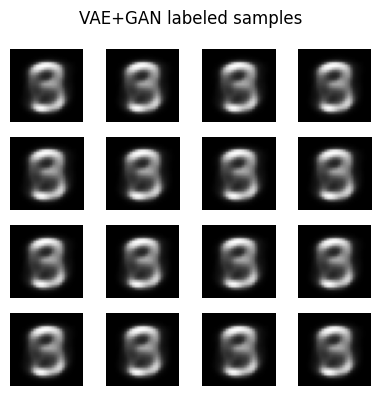

In [25]:
label_grid = cp.arange(16) % 10
samples_c = vae_gan.sample(num_samples=16, labels=label_grid)
plot_samples(samples_c, "VAE+GAN labeled samples")